### Linear Regression Task

Basically, linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable where both variable are quantitative.

In this task, the independent variable is Number of Hours a student studies while the dependent variable is the student. The essence of linear regression task in machine learning is to build a model that predicts a score in relation to the efect of another score.

The general formular of linear regression is given by:


$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $


In [1]:
#importing libaries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
#downloaded my data into excel so that I don't have to import from url
#However, the link to the data will be included at the end of this assesment

data = pd.read_excel(r"C:\Users\pc\Documents\score.xlsx")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Visualization

There may be many approaches to this but the best approach is a line plot or scatter plot or regression plot. The essence of this plot is to visually check if there are any relationship between the two variables.

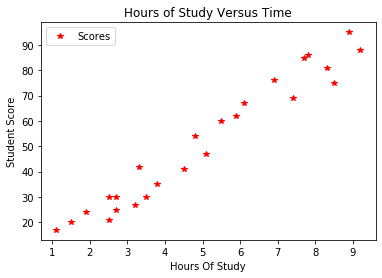

In [4]:
data.plot(x='Hours', y='Scores', style='*', color='r')  
plt.title('Hours of Study Versus Time')  
plt.xlabel('Hours Of Study')  
plt.ylabel('Student Score')  
plt.show()
plt.grid=True


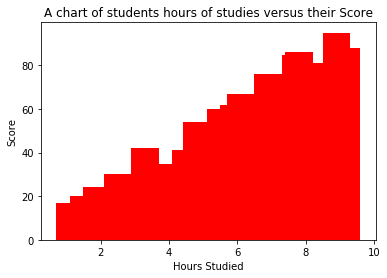

In [5]:
#Using Barchart
plt.bar("Hours", "Scores", data = data, color = "r")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("A chart of students hours of studies versus their Score")
plt.show()

(4.409190586759181, 102.06194557043301)

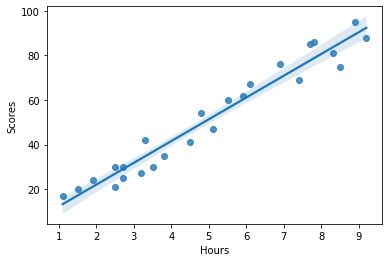

In [6]:
#Using Regression plot
sns.regplot(x='Hours', y="Scores", data=data)
plt.ylim()


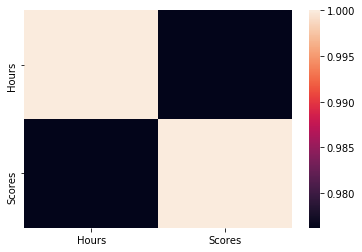

In [7]:
#Using Seamap
corr=data.corr()
sns.heatmap(corr)

### Observation

Judging from the charts, it is classic too say that there is a positive relationship between the hours of studies and the score. In other words, the longer any student studies, the higher the percentage of their score

### Preparing the dataset

The next step is to prepare our data. We can do this by splitting the dataset into X and y respectively. Where X is the input and y is the label. To do this, I will use the pandas iloc function (which selects a particular row of the dataset)

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
#Training The Model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=10)

In [10]:
#Take a look at the dataset
X_train

array([[7.4],
       [1.1],
       [5.5],
       [5.9],
       [3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [11]:
y_train

array([69, 17, 60, 62, 35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21,
       95, 30, 25], dtype=int64)

### Training The Model

In [12]:
clf = LinearRegression()
model = clf.fit(X_train,y_train)
pred = model.predict(X_train)
print("Completed")

Completed


In [13]:
print(pred)

[75.27582547 13.44570118 56.62864513 60.5543673  39.94432587 86.07156145
 70.36867275 92.94157527 62.51722839 78.2201171  49.75863132 79.20154764
 84.10870037 29.14858989 27.1857288  21.29714553 27.1857288  89.99728363
 37.00003424 29.14858989]


In [14]:
# Comparing Actual vs Predicted
data_grip = pd.DataFrame({'Actual': y_train, 'Predicted': pred})  
data_grip

,Actual,Predicted
0,69,75.275825
1,17,13.445701
2,60,56.628645
3,62,60.554367
4,35,39.944326
5,75,86.071561
6,76,70.368673
7,88,92.941575
8,67,62.517228
9,85,78.220117


### Find The Coefficient Of The Model

In [15]:
#For the intercept
print('Intercept: ', clf.intercept_)

#For The Slope
print('Slope: ', clf.coef_)

Intercept:  2.6499651894038863
Slope:  [9.81430544]


Therefore, this linear model is given by the equation

Score = 2.65 + 9.81 * Hours

### Making Prediction For Any Student That Studies for 9.25hours

In [16]:
hours = 9.25
prediction = clf.predict(np.array(hours).reshape(1,1))
print('No of Hours is: ', (hours))
print("Predicted Score for 9.25 hours is: ",(prediction[0]))

No of Hours is:  9.25
Predicted Score for 9.25 hours is:  93.43229053722452


From the predicttion above, it is estimated that any student that studies for 9.25 hours is likely to get a score of 93.43 which is excellent.

### Residual Analysis

Residual analysis is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and an observed actual value.

Residual analysis therefore is a useful class techniqus for the evaluation of the goodness of the fitted model.

it is given by the formular

$ri = y_actual - y_pred$

In [17]:
res = y_train - pred
print(res)

[ -6.27582547   3.55429882   3.37135487   1.4456327   -4.94432587
 -11.07156145   5.63132725  -4.94157527   4.48277161   6.7798829
   4.24136868   6.79845236  -3.10870037   0.85141011   2.8142712
   2.70285447  -6.1857288    5.00271637  -7.00003424  -4.14858989]


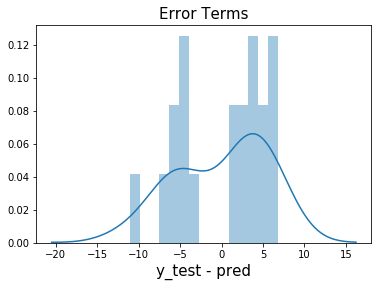

In [18]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_test - pred', fontsize = 15)
plt.show()